<a href="https://colab.research.google.com/github/Prixhaa/stock-prediction-app/blob/main/stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 91.5605
Root Mean Squared Error: 9.5687
R² Score: 0.7384


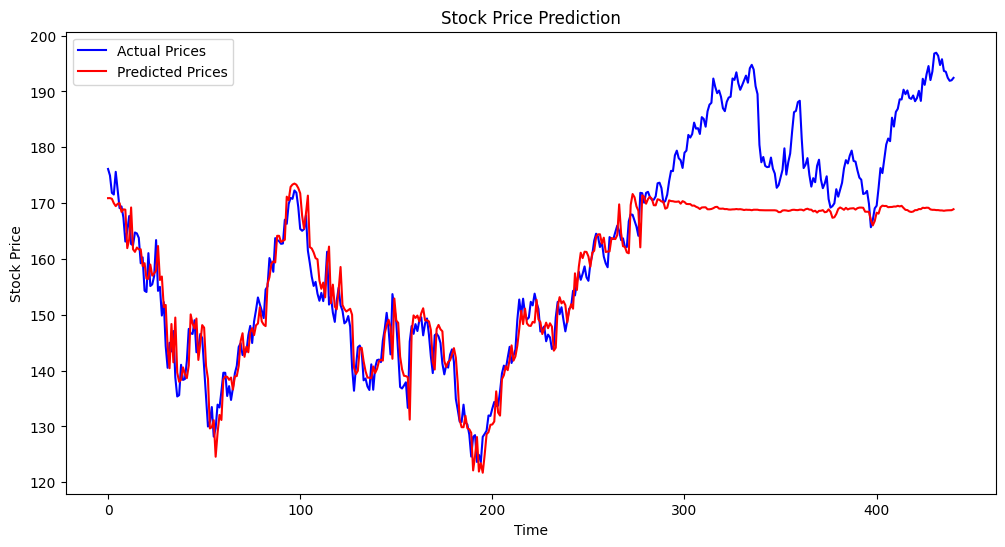

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import math

# Function to fetch stock data
def get_stock_data(ticker, start="2015-01-01", end="2024-01-01"):
    df = yf.download(ticker, start=start, end=end)
    df = df[['Close']]
    return df

# Function to prepare data for training
def prepare_data(df, time_step=60):
    scaler = MinMaxScaler(feature_range=(0,1))
    df_scaled = scaler.fit_transform(df)

    X, Y = [], []
    for i in range(len(df_scaled)-time_step-1):
        X.append(df_scaled[i:(i+time_step), 0])
        Y.append(df_scaled[i+time_step, 0])

    X, Y = np.array(X), np.array(Y)
    train_size = int(len(X) * 0.80)

    X_train, X_test = X[:train_size], X[train_size:]
    Y_train, Y_test = Y[:train_size], Y[train_size:]

    return X_train, X_test, Y_train, Y_test, scaler

# Train the Random Forest Model
def train_model(X_train, Y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, Y_train)
    return model

# Function to plot actual vs predicted data
def plot_stock_data(Y_test, Y_pred):
    plt.figure(figsize=(12, 6))
    plt.plot(Y_test, label="Actual Prices", color="blue")
    plt.plot(Y_pred, label="Predicted Prices", color="red")
    plt.title("Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

# Run the prediction process in Google Colab
ticker = "AAPL"  # Change this to any stock ticker
df = get_stock_data(ticker)
X_train, X_test, Y_train, Y_test, scaler = prepare_data(df)
model = train_model(X_train, Y_train)
Y_pred = model.predict(X_test)

# Rescale predictions back to original price scale
Y_pred = scaler.inverse_transform(Y_pred.reshape(-1, 1)).flatten()
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1)).flatten()

# Print model evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot the results
plot_stock_data(Y_test, Y_pred)
